In [1]:
import pandas as pd 
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# Matplotlib plots are displayed directly in the Jupyter Notebook 
matplotlib.rcParams['figure.figsize'] = (5,6)

In [2]:
Data = pd.read_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\DMPA_CCEB_38_57_62\\cleaned_data_1.csv")
Data.sample (3)

,id,line_item_quantity,unit_price,pack_price,line_item_value,line_item_insurance,sub_classification,dosage,weight
2996,45197,27,0.38,23.00,620.91,0.64,Adult,150/300mg,Weight Captured Separately
1603,12618,945,0.02,1.49,1408.05,3.04,Adult,30mg,62
2051,21276,4529,0.01,2.12,9601.48,15.84,Pediatric,10mg/ml,1679


In [3]:
Data.isnull().sum()

id                     0
line_item_quantity     0
unit_price             0
pack_price             0
line_item_value        0
line_item_insurance    0
sub_classification     0
dosage                 0
weight                 0
dtype: int64

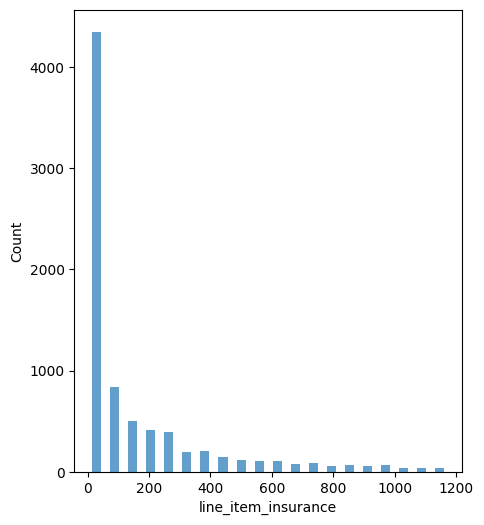

In [4]:
Data.rename(columns={'line item insurance (usd)': 'line_item_insurance'}, inplace=True)

# HISTOGRAM
plt.hist(Data.line_item_insurance, bins=20, rwidth=0.5, alpha=0.7)
plt.xlabel('line_item_insurance')
plt.ylabel('Count')
plt.show()



In [5]:
Data.line_item_insurance.describe()

count    7865.000000
mean      154.312588
std       238.537402
min         0.000000
25%         5.990000
50%        40.870000
75%       202.980000
max      1175.020000
Name: line_item_insurance, dtype: float64

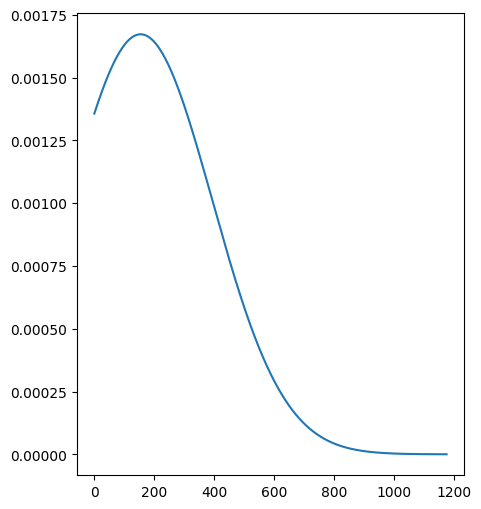

In [6]:
# displaying a probability density function (PDF) plot for the "line_item_insurance" column
# visually comparing the distribution of your data to a normal distribution.
from scipy.stats import norm
Data.rename(columns={'line item insurance': 'line_item_insurance'}, inplace=True)
rng = np.arange(Data.line_item_insurance.min(), Data.line_item_insurance.max(), 0.1) 
plt.plot(rng, norm.pdf(rng,Data.line_item_insurance.mean () ,Data.line_item_insurance.std()))

In [7]:
# calculates the upper and lower limits based on three times the standard deviation 
# from the mean of the "line_item_insurance" column 

upper_limit = Data.line_item_insurance.mean () + 3*Data.line_item_insurance.std()
upper_limit

lower_limit = Data.line_item_insurance.mean () -3*Data.line_item_insurance.std()
lower_limit

Data[(Data.line_item_insurance>upper_limit) | (Data.line_item_insurance<lower_limit)]
Data.sample (3)


,id,line_item_quantity,unit_price,pack_price,line_item_value,line_item_insurance,sub_classification,dosage,weight
6416,84858,21984,0.12,7.27,159823.68,197.70,Adult,150/300mg,See DN-3339 (ID#:83718)
6167,84579,31836,0.15,8.76,278883.36,601.27,Adult,150/300mg,2565
4496,82385,1043,0.05,4.76,4964.68,8.19,Pediatric,100mg,332


In [8]:
# values within three standard deviations of the mean or the number of data points that fall within the defined range 
Data_no_outlier_std_dev = Data[(Data.line_item_insurance<upper_limit) & (Data.line_item_insurance>lower_limit)]
Data_no_outlier_std_dev.shape

(7633, 9)

In [9]:
# count of rows that were removed as outliers 
print(Data.shape[0])
Data.shape[0] - Data_no_outlier_std_dev.shape[0]

7865


232

In [10]:
# Z-scores can help identify how far each data point deviates from the mean 
Data['zscore'] = (Data.line_item_insurance - Data.line_item_insurance.mean( ))/Data.line_item_insurance.std()
Data.tail(3)


,id,line_item_quantity,unit_price,pack_price,line_item_value,line_item_insurance,sub_classification,dosage,weight,zscore
7862,86819,21072,0.11,6.52,137389.44,161.71,Adult,150/300mg,See DN-4313 (ID#:83921),0.031012
7863,86822,17465,0.11,6.52,113871.80,134.03,Adult,150/300mg,1392,-0.085029
7864,86823,36639,0.03,1.99,72911.61,85.82,Pediatric,30/60mg,Weight Captured Separately,-0.287136


In [11]:
(161.71-154.312588)/238.537402
# valid

0.03101153923022941

In [12]:
Data[Data['zscore']>3]
# Data.sample (3)

,id,line_item_quantity,unit_price,pack_price,line_item_value,line_item_insurance,sub_classification,dosage,weight,zscore
111,1888,47879,0.20,11.89,569281.31,910.85,Adult,150/300/200mg,5311,3.171567
112,1889,61021,0.20,11.89,725539.69,1160.86,Adult,150/300/200mg,6768,4.219663
427,7638,12560,0.34,41.10,516216.00,1011.78,Adult,200/50mg,3073,3.594687
452,7868,5178,0.33,89.11,461436.41,904.42,Adult,200mg,2666,3.144611
459,8192,100000,0.12,7.00,700000.00,1120.00,Adult,150/200/30mg,10303,4.048369
...,...,...,...,...,...,...,...,...,...,...
7757,86622,45711,0.17,20.22,924276.42,1143.33,Adult,200/50mg,See DN-3396 (ID#:84302),4.146173
7772,86651,93700,0.14,8.26,773962.00,957.39,Adult,150/300/200mg,12220,3.366673
7809,86718,114324,0.14,8.11,927167.64,953.13,Adult,150/300/200mg,See DN-3864 (ID#:85518),3.348814
7818,86729,110000,0.14,8.26,908600.00,934.04,Adult,150/300/200mg,See DN-3939 (ID#:82732),3.268785


In [13]:
Data[Data['zscore']<-3]
# Data.sample (3)

,id,line_item_quantity,unit_price,pack_price,line_item_value,line_item_insurance,sub_classification,dosage,weight,zscore


In [14]:
Data_no_outliers = Data[(Data.zscore<3) & (Data.zscore>-3)]
Data_no_outliers.head()

,id,line_item_quantity,unit_price,pack_price,line_item_value,line_item_insurance,sub_classification,dosage,weight,zscore
0,3,1000,0.03,6.20,6200.0,240.117626,Pediatric,10mg/ml,358,0.359713
1,15,31920,0.07,3.99,127360.8,240.117626,Adult,150mg,1855,0.359713
2,16,38000,0.05,3.20,121600.0,240.117626,Adult,30mg,7590,0.359713
3,23,416,0.02,5.35,2225.6,240.117626,Pediatric,10mg/ml,504,0.359713
4,44,135,0.36,32.40,4374.0,240.117626,Pediatric,200mg,328,0.359713


In [15]:
Data_no_outliers = Data[(Data.zscore<3) & (Data.zscore>-3)]
outliers_removed=Data.shape[0] - Data_no_outliers.shape[0]
outliers_removed

232

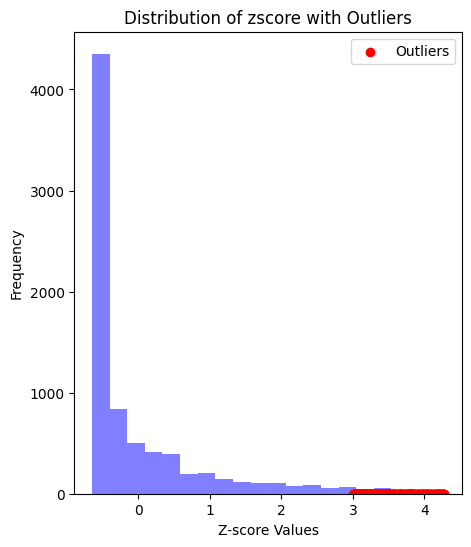

In [16]:
attribute_to_plot = Data['zscore']

# Set a threshold for outliers (e.g., 3 standard deviations from the mean)
threshold = 3

# Plot a histogram of the selected attribute
plt.hist(attribute_to_plot, bins=20, color='blue', alpha=0.5)

# Highlight outliers above the threshold
outliers = attribute_to_plot[attribute_to_plot > threshold]
plt.scatter(outliers, [0] * len(outliers), color='red', marker='o', label='Outliers')

plt.title('Distribution of zscore with Outliers')
plt.xlabel('Z-score Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'Data_no_outliers' is the DataFrame after applying the z-score method
# Assuming you have a binary array indicating outliers (1) and non-outliers (0)
y_true = np.zeros(len(Data))  # Assuming all data points are non-outliers
y_true[Data.index.isin(Data_no_outliers.index)] = 1  # Set the true labels for outliers to 1

# Assuming 'attribute_to_plot' is the z-score values
# Set a threshold for outliers (e.g., 3 standard deviations from the mean)
threshold = 0.01

# Create a binary array indicating predicted outliers (1) and predicted non-outliers (0)
y_pred = np.where(attribute_to_plot > threshold, 1, 0)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Precision: 0.9001721170395869
Recall: 0.2740731036289794
F1 Score: 0.42020688962538916
Confusion Matrix:
[[   0  232]
 [5541 2092]]
